In [14]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

In [10]:
"""
create commit frequency dataset
"""


commits = pd.read_csv("data/commits.csv")
commits["timestamp"] = pd.to_datetime(commits["timestamp"], unit="s")
commits_grouped = commits.groupby(["project", "timestamp"]).count()
commits_grouped = commits_grouped.reset_index()
commits_grouped = commits_grouped.set_index("timestamp")

projects = sorted(commits_grouped["project"].unique())

combined = DataFrame()
for project in projects:
    # set resolution of 2 weeks
    frequency = commits_grouped[commits_grouped["project"] == project].resample("2W").sum()
    frequency = frequency.rename(columns={"commit_hash": "commits_per_2weeks"})
    frequency["project"] = project
    combined = pd.concat([combined, frequency])

combined.to_csv("data/commit_frequency_2W.csv")



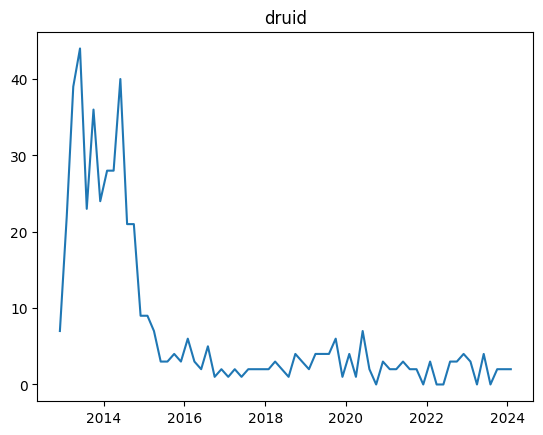

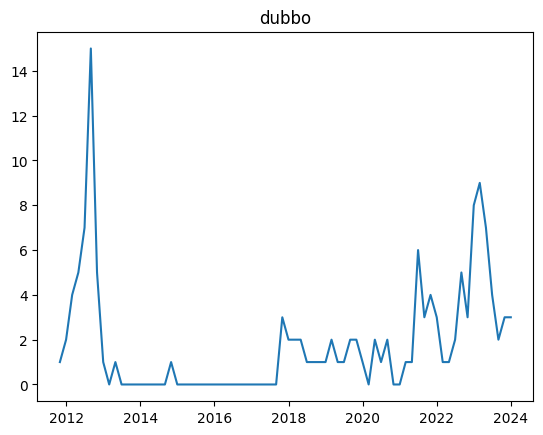

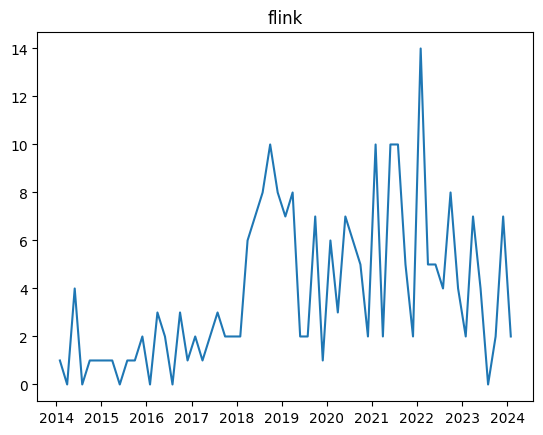

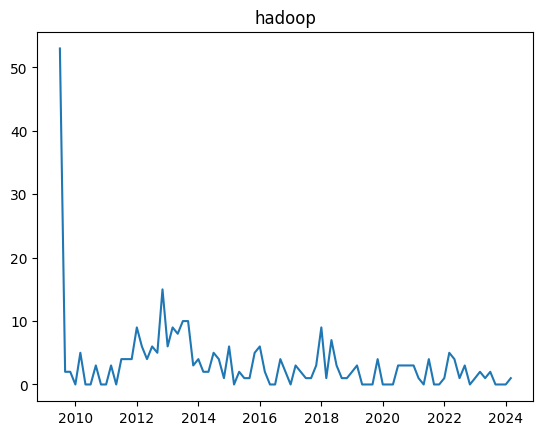

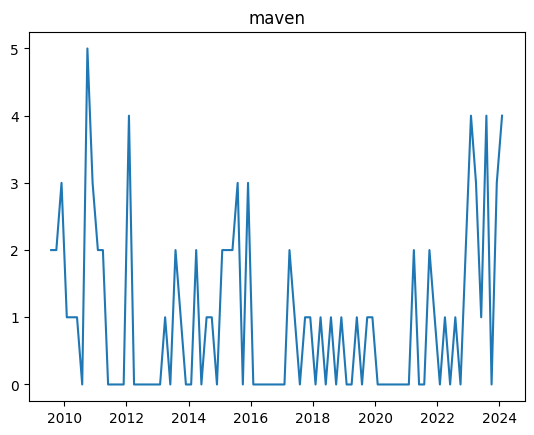

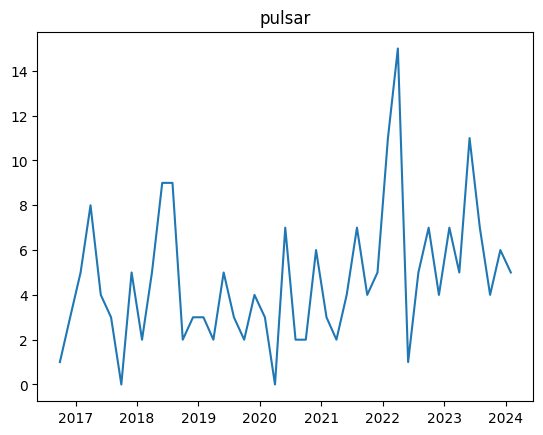

In [26]:
from pandas import DataFrame

"""
create release frequency dataset
"""

commits = pd.read_csv("data/releases.csv")
commits["timestamp"] = pd.to_datetime(commits["timestamp"], unit="s")
commits_grouped = commits.groupby(["project", "timestamp"]).count()
commits_grouped = commits_grouped.reset_index()
commits_grouped = commits_grouped.set_index("timestamp")

projects = sorted(commits_grouped["project"].unique())
combined = DataFrame()

for project in projects:
    # set resolution of 2 weeks
    frequency = commits_grouped[commits_grouped["project"] == project].resample("2ME").sum()
    frequency = frequency.rename(columns={"release_name": "releases_per_3months"})
    frequency["project"] = project
    combined = pd.concat([combined, frequency])
    frequency.reset_index(inplace=True)
    plt.plot(frequency["timestamp"], frequency["releases_per_3months"])
    plt.title(project)
    plt.show()

combined.to_csv("data/release_frequency_3M.csv")